In [1]:
from ase.io import read
# from gGA.data import AtomicData, AtomicDataDict
from gGA.data_np import AtomicData, AtomicDataDict
from gGA.utils.make_kpoints import kmesh_sampling
import torch
from gGA.nn.ghostG import GhostGutzwiller
from gGA.utils.tools import setup_seed
from gGA.utils.tools import get_semicircle_e_list
import numpy as np
from gGA.data import _keys

setup_seed(124)

torch.set_default_dtype(torch.float64)
U = 1.
J = 0.0 * U # 0.25 * U
Up = U - 2*J
Jp = J

alpha = 1.
V = 1.0
ep = -1.0
e_list = get_semicircle_e_list(nmesh=1000)

eks = np.zeros((len(e_list), 2, 2))+0j
eks += np.array([[[0.,  V],
                 [V,   ep]]],dtype=np.complex128)
eks[:,1,1] += alpha * e_list

phy_onsite = {
    "C": np.array([
        [[-U/2, 0.],
        [0., 0.]]
    ]),
}

intparams = {"C":[{"U":U,"Up":Up,"J":J, "Jp":Jp}]}

print(intparams)

gga = GhostGutzwiller(
    atomic_number=np.array([6]),
    nocc=3,
    basis={"C":[1,1]},
    idx_intorb={"C":[0]},
    naux=3,
    intparams=intparams,
    nspin=1,
    kBT=0.0002,
    mutol=1e-7,
    solver="ED",
    mixer_options={"method": "Linear", "a": 0.3},
    iscomplex=False,
    solver_options={}# {"mfepmin":500, "channels": 10},
)

# hop = - torch.diag(torch.tensor([0., 1.])) * (1/6)
# # hop = torch.stack([hop, torch.zeros_like(hop), torch.zeros_like(hop), hop]).reshape(2,2,2,2).permute(2,0,3,1).reshape(4,4)

# on = torch.tensor([-U/2, V, V, ep]).reshape(2,2)
# # on = torch.stack([on, torch.zeros_like(on), torch.zeros_like(on), on]).reshape(2,2,2,2).permute(2,0,3,1).reshape(4,4)

# block = {
#     "0_0_0_0_0": on,
#     "0_0_0_0_1": hop,
#     "0_0_0_1_0": hop,
#     "0_0_1_0_0": hop
# }

atomicdata = AtomicData.from_ase(
    read("/nessa/users/zhanghao/dev/Hubbard/gGA/test/C_cube.vasp"),
    r_max=3.1
    )

# atomicdata["kpoint"] = torch.tensor(kmesh_sampling([10,10,10], True)).to(torch.get_default_dtype())
# block_to_feature(atomicdata, gga.kinetic.idp_phy, block)
atomicdata = AtomicData.to_AtomicDataDict(atomicdata)
atomicdata[_keys.HAMILTONIAN_KEY] = eks
atomicdata[_keys.PHY_ONSITE_KEY] = phy_onsite

{'C': [{'U': 1.0, 'Up': 1.0, 'J': 0.0, 'Jp': 0.0}]}


In [ ]:
gga.run(atomicdata, 500, 1e-4)

DM_kin:  [0.01250972 0.01250972 0.4986446  0.4986446  0.98885561 0.98885561
 0.99999006 0.99999006]
 -- Current error: 0.61628
DM_kin:  [3.18801426e-04 3.18801426e-04 5.01927023e-01 5.01927023e-01
 9.97754206e-01 9.97754206e-01 9.99999958e-01 9.99999958e-01]
 -- Current error: 0.22486
DM_kin:  [5.70231626e-04 5.70231626e-04 5.01810711e-01 5.01810711e-01
 9.97619441e-01 9.97619441e-01 9.99999650e-01 9.99999650e-01]
 -- Current error: 0.15731
DM_kin:  [7.76301401e-04 7.76301401e-04 5.01770229e-01 5.01770229e-01
 9.97455127e-01 9.97455127e-01 9.99998347e-01 9.99998347e-01]
 -- Current error: 0.11051
DM_kin:  [9.53648275e-04 9.53648275e-04 5.01810106e-01 5.01810106e-01
 9.97241538e-01 9.97241538e-01 9.99994674e-01 9.99994674e-01]
 -- Current error: 0.07809
DM_kin:  [0.00111662 0.00111662 0.50193201 0.50193201 0.99696431 0.99696431
 0.99998707 0.99998707]
 -- Current error: 0.06034
DM_kin:  [0.00127341 0.00127341 0.50213257 0.50213257 0.99661929 0.99661929
 0.99997476 0.99997476]
 -- Curren

In [ ]:
U = 3.0
J = 0.0 * U # 0.25 * U
Up = U - 2*J
Jp = J
intparams = {"C":[{"U":U,"Up":Up,"J":J, "Jp":Jp}]}
gga.update_intparam(intparams)
gga.run(atomicdata, 200, 1e-7)

Find E_fermi: 0.5741
DM_kin:  tensor([0.0021, 0.0021, 0.5000, 0.5000, 0.9979, 0.9979, 1.0000, 1.0000])
DM_emb:  tensor([0.0592, 0.0592, 0.5000, 0.5000, 0.5000, 0.5000, 0.9998, 0.9998])
 -- Current error: 0.00000
Find E_fermi: 0.5741
DM_kin:  tensor([0.0021, 0.0021, 0.5000, 0.5000, 0.9979, 0.9979, 1.0000, 1.0000])
DM_emb:  tensor([0.0592, 0.0592, 0.5000, 0.5000, 0.5000, 0.5000, 0.9998, 0.9998])
 -- Current error: 0.00000
Find E_fermi: 0.5741
DM_kin:  tensor([0.0021, 0.0021, 0.5000, 0.5000, 0.9979, 0.9979, 1.0000, 1.0000])
DM_emb:  tensor([0.0592, 0.0592, 0.5000, 0.5000, 0.5000, 0.5000, 0.9998, 0.9998])
 -- Current error: 0.00000
Find E_fermi: 0.5741
DM_kin:  tensor([0.0021, 0.0021, 0.5000, 0.5000, 0.9979, 0.9979, 1.0000, 1.0000])
DM_emb:  tensor([0.0592, 0.0592, 0.5000, 0.5000, 0.5000, 0.5000, 0.9998, 0.9998])
 -- Current error: 0.00000
Find E_fermi: 0.5741
DM_kin:  tensor([0.0021, 0.0021, 0.5000, 0.5000, 0.9979, 0.9979, 1.0000, 1.0000])
DM_emb:  tensor([0.0592, 0.0592, 0.5000, 0.5000, 

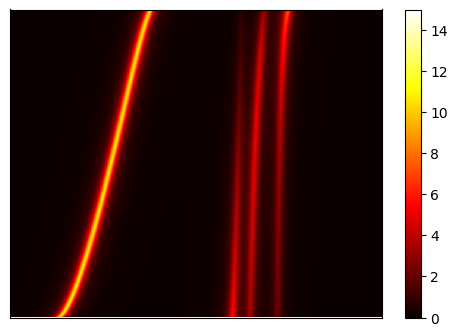

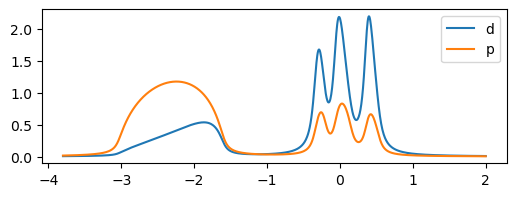

In [6]:
Es = np.linspace(-3.8,2, 1000) + gga.E_fermi
GF = gga.compute_GF(Es=Es, data=atomicdata, eta=0.06)
ARPES = -(1/torch.pi)*GF.imag.diagonal(offset=0, axis1=-1, axis2=-2)
pdos = ARPES.sum(0) / ARPES.shape[0]
pdos = pdos.reshape(-1,2,2).sum(-1)
dos = pdos.sum(-1)
ARPES = ARPES.sum(-1)


import matplotlib.pyplot as plt
ARPES = np.flip(ARPES, (0,))
fig, ax = plt.subplots(figsize=(6,4))
m = ax.matshow(ARPES, cmap="hot", vmin=0, vmax=15)
ax.set_aspect('auto')  # override the default 'equal'
ax.set_xticks([])
ax.set_yticks([])
fig.colorbar(m)
plt.show()

plt.figure(figsize=(6,2))
# plt.plot(Es, dos)
plt.plot(Es-gga.E_fermi, pdos)
plt.legend(["d", "p"])
plt.show()